In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [29]:
# Load the data
df = pd.read_csv("studper.csv")

# Define independent and dependent variables
X = df[['Hours Studied', 'Previous Scores']]
y = df['Performance Index']

In [30]:
# Create and train the model
model = LinearRegression()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [31]:

# Model evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Coefficients: [2.85815458 1.01737155]
Intercept: -29.67025988675902
Mean Squared Error: 5.2419211865515205
R^2 Score: 0.985855014245765


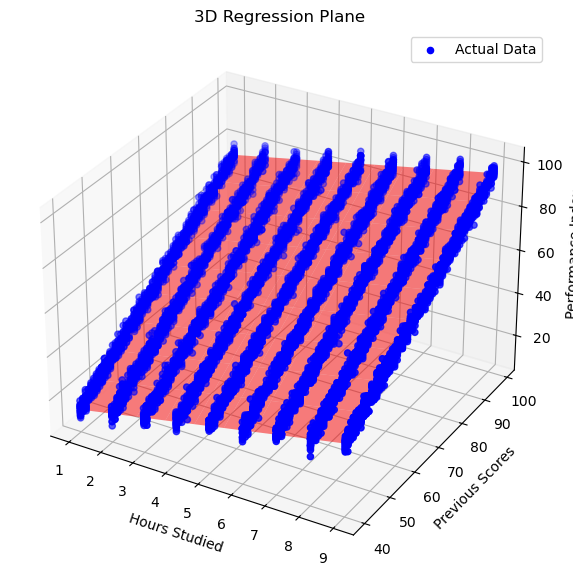

In [32]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Actual data points
ax.scatter(df['Hours Studied'], df['Previous Scores'], df['Performance Index'], color='blue', label='Actual Data')

# Create grid for the regression plane
x1_range = np.linspace(df['Hours Studied'].min(), df['Hours Studied'].max(), 10)
x2_range = np.linspace(df['Previous Scores'].min(), df['Previous Scores'].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = model.intercept_ + model.coef_[0] * x1_grid + model.coef_[1] * x2_grid

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, color='red')

# Axis labels
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Previous Scores')
ax.set_zlabel('Performance Index')
ax.set_title('3D Regression Plane')

plt.legend()
plt.show()